### 작업형1 예시문제
- 참고 사이트
- https://www.datamanim.com/dataset/03_dataq/main_p1.html
- https://blog.naver.com/statstorm/222364100877
- https://rfriend.tistory.com/tag/sklearn..preprocessing..minmax_scale%28%29

#### 1-1
mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 최소최대 척도(Min-Max Scale)로 변환한 후 0.5보다 큰 값을 가지는 레코드 수를 구하시오.

In [40]:
import pandas as pd
df = pd.read_csv('../data/mtcars.csv')
df.head(3)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [41]:
df['qsec'].describe()

count    32.000000
mean     17.848750
std       1.786943
min      14.500000
25%      16.892500
50%      17.710000
75%      18.900000
max      22.900000
Name: qsec, dtype: float64

In [42]:
# 1. 최소값, 최대값을 구해서 '0~1'로 변환 (array로 안바꾸고)
qsec = df['qsec']
#qsec = df.loc[:,'qsec']
qsec_minmax = (qsec - qsec.min())/(qsec.max() - qsec.min())
Num = len(qsec_minmax[qsec_minmax>0.5])
print('record :', Num)

record : 9


In [43]:
# 최소값, 최대값을 구해서 '0~1'로 변환 (array로 바꿔서)
import numpy as np
X = np.array(df['qsec'])
X

array([16.46, 17.02, 18.61, 19.44, 17.02, 20.22, 15.84, 20.  , 22.9 ,
       18.3 , 18.9 , 17.4 , 17.6 , 18.  , 17.98, 17.82, 17.42, 19.47,
       18.52, 19.9 , 20.01, 16.87, 17.3 , 15.41, 17.05, 18.9 , 16.7 ,
       16.9 , 14.5 , 15.5 , 14.6 , 18.6 ])

In [44]:
X_MinMax = (X - X.min())/(X.max()-X.min())
overNum = len(X_MinMax[X_MinMax > 0.5])
print('record :', overNum)

record : 9


In [45]:
# 2. minmax_scale 사용
from sklearn.preprocessing import minmax_scale
X_MinMax_Scale = minmax_scale(X,axis=0,copy=True) #?
#X_MinMax_Scale
print('record :', len(X_MinMax_Scale[X_MinMax_Scale>=0.5]))

record : 9


#### 1-2
mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 표준정규분포 데이터 표준화 (standardization) 변환 후 최대, 최소값을 각각 구하시오.

In [46]:
qsec = df['qsec']
mean = qsec.mean()
std = qsec.std()
z = (qsec-mean)/std
z = np.array(z)
#z
Min = z.min()
Max = z.max()
print('Min :',Min, 'Max :',Max)

Min : -1.8740102832334835 Max : 2.826754592962484


#### 1-3
*mtcars 데이터셋(mtcars.csv)의 wt 컬럼의 이상치(IQR 1.5 외부에 존재하는)값들을 outlier 변수에 저장하라

In [47]:
import numpy as np

wt = df['wt']
q25, q75 = np.percentile(wt.values, [25, 75])
IQR = q75 - q25

outlier = wt[(wt > q75 + IQR * 1.5) | (wt < q25 - IQR * 1.5)].values
outlier

array([5.25 , 5.424, 5.345])

#### 이상치탐지삭제 함수만들기 
https://hwi-doc.tistory.com/entry/IQR-방식을-이용한-이상치-데이터Outlier-제거

#### 1-4
mtcars 데이터셋에서 mpg변수와 나머지 변수들의 상관계수를 구하여 다음과 같이 내림차순 정렬하여 표현하라

In [52]:
# mpg와 모든 변수의 상관계수 구하기
df.corr()[['mpg']]

,mpg
mpg,1.000000
cyl,-0.852162
disp,-0.847551
hp,-0.776168
drat,0.681172
wt,-0.867659
qsec,0.418684
vs,0.664039
am,0.599832
gear,0.480285


In [53]:
# 내림차순으로 정렬
df.corr()[['mpg']].sort_values(by = 'mpg' ,ascending = False)

,mpg
mpg,1.000000
drat,0.681172
vs,0.664039
am,0.599832
gear,0.480285
qsec,0.418684
carb,-0.550925
hp,-0.776168
disp,-0.847551
cyl,-0.852162


#### 1-5
mtcars 데이터셋에서 mpg변수를 제외하고 데이터 정규화 (standardscaler) 과정을 진행한 이후 PCA를 통해 변수 축소를 하려한다. 누적설명 분산량이 92%를 넘기기 위해서는 몇개의 주성분을 선택해야하는지 설명하라

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
pca_df = df.iloc[:,2:]
pca_df = sc.fit_transform(pca_df)
#pca_df


In [55]:
from sklearn.decomposition import PCA
componentsNum = 10
pca = PCA(n_components=componentsNum)
printcipalComponents = pca.fit_transform(pca_df)
principalDf = pd.DataFrame(data = printcipalComponents, columns = ['component'+str(x) for x in range(componentsNum)])

In [56]:
principalDf.head()

,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9
0,0.632134,1.739877,-0.665110,0.100862,-0.927621,0.051528,-0.400939,-0.177965,-0.067495,-0.163161
1,0.605027,1.554343,-0.434619,0.190621,-1.033729,-0.156044,-0.421950,-0.085054,-0.125251,-0.071543
2,2.801549,-0.122632,-0.414510,-0.263449,0.446730,-0.507376,-0.291290,-0.084116,0.162350,0.181756
3,0.259204,-2.364265,-0.095090,-0.505929,0.552199,-0.035541,-0.058233,-0.188187,-0.101924,-0.166531
4,-2.032508,-0.774822,-1.016381,0.081071,0.200412,0.163234,0.285340,0.116682,-0.108244,-0.181168


In [57]:
componentDf = pd.DataFrame(pca.explained_variance_ratio_,columns=['cumsumVariance']).cumsum().reset_index()
componentDf['index'] +=1
componentDf=componentDf.rename(columns={'index':'componentsCount'})
componentDf

,componentsCount,cumsumVariance
0,1,0.576022
1,2,0.840986
2,3,0.900708
3,4,0.927658
4,5,0.949883
5,6,0.970895
6,7,0.984187
7,8,0.992255
8,9,0.997620
9,10,1.000000


#### 1-6
mtcars 의 index는 (업체명) - (모델명)으로 구성된다. (valiant는 업체명) mtcars에 ‘brand’ 컬럼을 추가하고 value 값으로 업체명을 입력하라

참고 : https://steadiness-193.tistory.com/22

In [58]:
# df 데이터프레임에서 인덱스 값 확인 
pd.DataFrame(df.iloc[:3,0])
#df.info()
#df.dtypes
df['in_dex'] = df['Unnamed: 0']
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,in_dex
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda RX4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda RX4 Wag
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun 710
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet 4 Drive
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet Sportabout


In [59]:
pd.Series(df.in_dex, dtype="string")
df['brand'] = df.in_dex.str.split(" ")
df['brand'] = df['brand'].str.get(0)
df['brand'].head(4)
df.head()


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,in_dex,brand
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda RX4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda RX4 Wag,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun 710,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet 4 Drive,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet Sportabout,Hornet


In [60]:
df = df.drop(columns = ['in_dex'])

In [61]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet


### 1-7
추가된 brand 컬럼을 제외한 모든 컬럼을 통해 pca를 실시한다. 2개의 주성분과 brand컬럼으로 구성된 새로운 데이터 프레임을 출력하고, brand에 따른 2개 주성분을 시각화하여라 (brand를 구분 할수 있도록 색이다른 scatterplot, legend를 표시한다)

In [62]:
#iloc 인덱스로 접근 
df_pca_all = df.iloc[:,1:-1]
df_pca_all.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [75]:
from sklearn.decomposition import PCA
componentsNum = 2
pca = PCA(n_components=componentsNum)
printcipalComponents = pca.fit_transform(df_pca_all)
principalDf_all = pd.DataFrame(data = printcipalComponents, columns = ['component'+str(x) for x in range(componentsNum)])

In [76]:
# 새로운 데이터프레임 만들기 (주성분 2개 + brand)
pca_df_brand = principalDf_all
pca_df_brand['brand'] = df['brand']
pca_df_brand.head()

,component0,component1,brand
0,-79.596425,-2.132241,Mazda
1,-79.598570,-2.147487,Mazda
2,-133.894096,5.057570,Datsun
3,8.516559,-44.985630,Hornet
4,128.686342,-30.817402,Hornet


<AxesSubplot:xlabel='component0', ylabel='component1'>

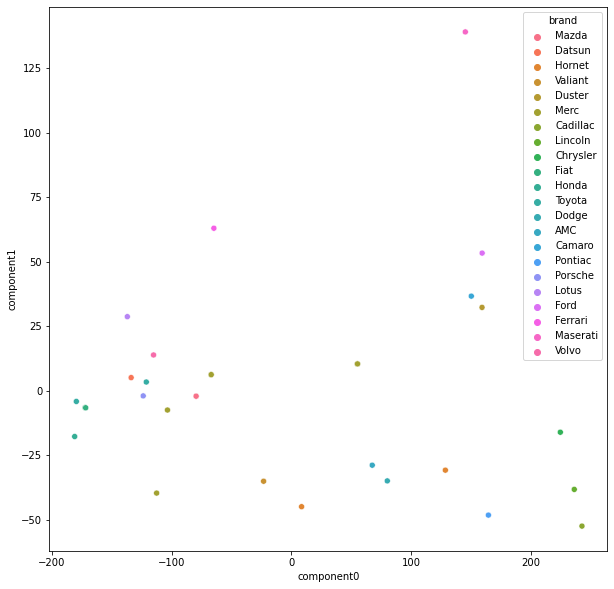

In [77]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x='component0',y='component1',hue='brand',data=pca_df_brand)
# legend 표시하기 싫으면, legend = False 